<a href="https://colab.research.google.com/github/Anand-017/TASK6/blob/main/TASK_6Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]
                       }
df = pd.DataFrame(ground_cricket_data)

**CHECKING IF DATA IS GOOD, IF FEATURES NEEDS ENCODING AND CHECKING FOR LINEAR RELATIONSHIP B/W FEATURE AND OUTPUT**

In [ ]:
df.shape

(15, 2)

In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

**CHECKING IF DATA NEEDS TO BE ENCODED (IF ALL THE DATA IS OF NUMERIC TYPIC)**

In [ ]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

**CHECKING IF THERE IS A LINEAR RELATION BETWEEN FEATURE AND TARGET**

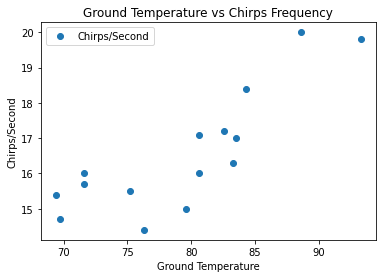

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [ ]:
df.plot(x='Ground Temperature', y='Chirps/Second', style='o')
plt.title('Ground Temperature vs Chirps Frequency')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

df.corr()

1.High Correlation b/w data. hence can perform** LINEAR REGRESSION**.

1.As the data has a feature (Ground Temperature) and a target output (Chirps/Second), Hence it of **SUPERVISED LEARNING**.
2.As the values are continuous values, hence it of **REGRESSION**.

**TASK 1**

Find the linear regression equation for this data.

In [ ]:
#SPLITING THE DATA INTO TRAINING AND TESTING

from sklearn.model_selection import train_test_split

X= df[['Ground Temperature']].values  # OR .iloc[: , -1:0:-1].values OR drop('Chirps/Second', axis=1).values # Ground Temperature-- array of features
Y= df['Chirps/Second'].values         # OR .iloc[ : , 0].values  # Chirps/Second-- array of targerts

#X
#Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

#MODELLING

from sklearn.linear_model import LinearRegression           #Importing: importing all the required functions

regressor = LinearRegression()                              #Initialisation: Predicted Chirps/second = m * Ground Temperature + c  (y = m * x + c)

regressor.fit(X_train, Y_train)                             #Fitting: Learning happens - GD is done and we get the final values of m and c


Y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions

#Y_pred

In [ ]:
print("m: ",regressor.coef_[0]) #m
print("c: ",regressor.intercept_) # c

m:  0.17314533230672624
c:  2.4232857738911893


In [ ]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1

,Actual,Predicted
0,16.0,14.820492
1,17.2,16.725090
2,19.8,18.577745
3,20.0,17.763962
4,15.4,14.439572


THE LINEAR REGRESSION EQUATION FOR THE DATA

In [ ]:
#y = m * x + c

print("Predicted Chirps/second (Y) = {} * Ground_Temperature (x) + {}".format(regressor.coef_[0],regressor.intercept_))

Predicted Chirps/second (Y) = 0.17314533230672624 * Ground_Temperature (x) + 2.4232857738911893


**TASK 2**

Chart the original data and the equation on the chart.

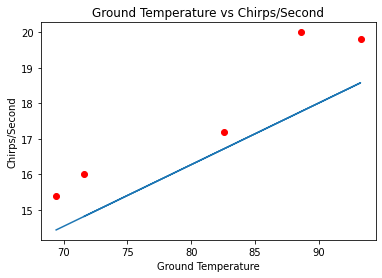

In [ ]:
plt.plot(X_test, Y_test, 'or')
plt.plot(X_test, Y_pred)
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

**TASK 3**

Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data.

In [ ]:
from sklearn import metrics
print('R2- SCORE for this Equation :', metrics.r2_score(Y_test,Y_pred))

R2- SCORE for this Equation : 0.501711536080021


**TASK 4**

Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [ ]:
# GIVEN GROUND TEMPERATURE = 95 F
# FIND CHIRPS/SECOND OR CHIRPS FREQUENCY

#   FORMULA
#       Predicted Chirps/second = (regressor.coef_ * Ground Temperature) + regressor.intercept_    (y = m * x + c)

print("Predicted Chirps Frequency (Chirps/second) at 95 F:", round( regressor.predict( [[95]] )[0], 4 ) )

Predicted Chirps Frequency (Chirps/second) at 95 F: 18.8721


**TASK 5**

Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [ ]:
# GIVEN CHIRPS/SECOND OR CHIRPS FREQUENCY = 18
# FIND APPROX. GROUND TEMPERATURE

#   FORMULA
#       Predicted Chirps/second = (regressor.coef_ * Ground Temperature) + regressor.intercept_    (y = m * x + c)
#       Predicted Ground Temperature  =  (Chirps/Second - regressor.intercept_) / regressor.coef_  (x = y - c / m)

y = 18
m = regressor.coef_[0]
c = regressor.intercept_

print("Approximate Ground Temperture when Chirps Frequency is 18:", round( (y - c ) / m, 3),"F")

Approximate Ground Temperture when Chirps Frequency is 18: 89.963 F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df_full = pd.read_fwf("brain_body.txt")

#df
df_full.sort_values(by='Body')

,Brain,Body
13,0.005,0.14
39,0.010,0.25
19,0.023,0.30
54,0.048,0.33
38,0.023,0.40
...,...,...
21,521.000,655.00
27,529.000,680.00
31,62.000,1320.00
18,2547.000,4603.00


**CHECKING IF DATA IS GOOD, IF NEEDS ENCODING**

In [ ]:
df_full.shape

(62, 2)

In [ ]:
df_full.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df_full.duplicated(keep='first')

0     False
1     False
2     False
3     False
4     False
      ...  
57    False
58    False
59    False
60    False
61    False
Length: 62, dtype: bool

In [ ]:
#CHECKING IF DATA NEEDS TO BE ENCODED (IF ALL THE DATA IS OF NUMERIC TYPIC)

df_full.dtypes

Brain    float64
Body     float64
dtype: object

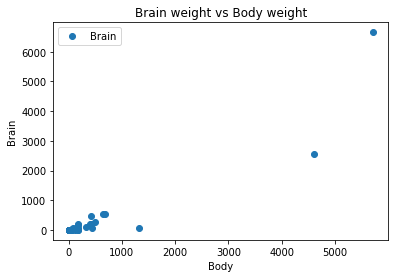

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [ ]:
#CHECKING IF THERE IS A LINEAR RELATION BETWEEN FEATURE AND TARGET

#df_full.groupby('Body')['Brain'].mean().plot()
df_full.plot(x='Body', y='Brain', style='o')
plt.title('Brain weight vs Body weight')
plt.xlabel('Body')
plt.ylabel('Brain')
plt.show()

df_full.corr()

High Correlation b/w data. hence can perform LINEAR REGRESSION

**TASK 1**

In [ ]:
df_full.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


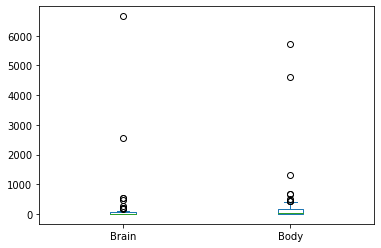

In [ ]:
df_full.plot(kind= 'box')

1.As the heaviest mammal in the world is 8000kg, it is safe to assume that the Maximum value for the **Average Body weight column** can be 5712kg. However, on plotting the data in the BOX PLOT, we can see that the IQR calculated considers them as Outliers.

2.So, we shall take 2 instances, one with the entire data and one with the outliers deleted, and then we shall create our models.

3.To delete the Outliers we shall calculate the 10th and 90th percentile and use these values to delete records.

In [ ]:
#Calculating 10th and 90th percentile to CAP the Data and remove OUTLIERS

tenth_percentile = np.percentile(df_full['Body'],10)
ninetieth_percentile = np.percentile(df_full['Body'],90)
#print("Tenth percentile: ", tenth_percentile)
#print("Nintieth percentile: ", ninetieth_percentile)

df_noOutliers = df_full.copy(deep=True)
df_noOutliers= df_noOutliers[(df_noOutliers['Body'] <= ninetieth_percentile) & (df_noOutliers['Body'] >= tenth_percentile)]

In [ ]:
df_noOutliers.describe() # NEW DATAFRAME WITHOUT OUTLIERS

,Brain,Body
count,48.000000,48.000000
mean,35.615208,76.060417
std,82.966056,113.081815
min,0.075000,1.200000
25%,0.915000,6.150000
50%,3.342500,17.250000
75%,18.037500,115.000000
max,465.000000,423.000000


SPLITING THE DATA INTO TRAINING AND TESTING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression           #importing all the required functions

In [ ]:
# MODEL WITH FULL DATA

X= df_full.iloc[ : , [1]].values  # Body weight-- array of features
Y= df_full.iloc[ : , 0].values  # Brain weight-- array of targerts

#X
#Y

#---------------------------------------
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
#Y_test

#--------------------------------------

#Modelling

regressor = LinearRegression()                              # predicted Body weight = m * Brain weight + c  (y = m * x + c)

regressor.fit(X_train, Y_train)                             #Learning happens - GD is done and we get the final values of m and c

#--------------------------------------

Y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions

#Y_pred

In [ ]:
#y = m * x + c

print("Predicted Brain weight (Y) = {} * Body_weight (x) + {}".format(regressor.coef_[0],regressor.intercept_))

Predicted Brain weight (Y) = 0.9076821017770534 * Body_weight (x) + -69.52661005015085


In [ ]:
from sklearn import metrics
print('R2- SCORE of this Equation:', metrics.r2_score(Y_test,Y_pred))

R2- SCORE of this Equation: -0.5965644350440855


In [ ]:
df_ofFull = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df_ofFull

,Actual,Predicted
0,2.500,-58.543657
1,0.101,-65.895882
2,1.350,-62.174385
3,60.000,3.995640
4,35.000,-18.696412
5,0.060,-68.618928
6,0.550,-67.348173
7,10.550,93.402327
8,0.425,-63.717445
9,100.000,72.979480


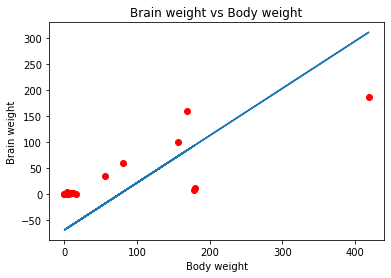

In [ ]:
plt.plot(X_test, Y_test, 'or')
plt.plot(X_test, Y_pred)
plt.title('Brain weight vs Body weight')
plt.xlabel('Body weight')
plt.ylabel('Brain weight')
plt.show()


In [ ]:
# MODEL WITH NO OUTLIERS

X_noOutliers= df_noOutliers.iloc[ : , [1]].values  # Body weight-- array of features
Y_noOutliers= df_noOutliers.iloc[ : , 0].values  # Brain weight-- array of targerts

#X
#Y

#--------------------------------------
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_noOutliers, Y_noOutliers, test_size=0.3)
#Y_test

#------------------------------------
#Modelling

regressor1 = LinearRegression()                              # predicted Body weight = m * Brain weight + c  (y = m * x + c)

regressor1.fit(X_train1, Y_train1)                             #Learning happens - GD is done and we get the final values of m and c

#------------------------------------

Y_pred1 = regressor1.predict(X_test1)

In [ ]:
#y = m * x + c

print("Predicted Brain weight (Y) = {} * Body_weight (x) + {}".format(regressor1.coef_[0],regressor1.intercept_))

Predicted Brain weight (Y) = 0.8583150006095283 * Body_weight (x) + -22.561909765200152


In [ ]:
print('R2- SCORE for this Equation:', metrics.r2_score(Y_test1,Y_pred1))

R2- SCORE for this Equation: 0.03431692751882265


In [ ]:
df_ofNoOutliers = pd.DataFrame({'Actual': Y_test1, 'Predicted': Y_pred1})
df_ofNoOutliers

,Actual,Predicted
0,0.480,-9.258027
1,0.920,-17.669514
2,2.500,-12.176298
3,207.000,325.913980
4,1.400,-11.832972
5,10.550,131.505633
6,192.000,131.934790
7,1.000,-16.897031
8,85.000,256.390465
9,0.104,-20.416122


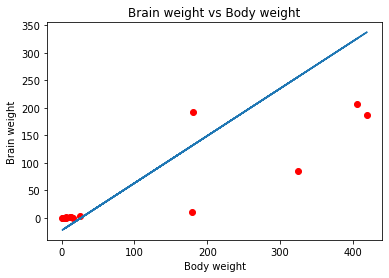

In [ ]:
plt.plot(X_test1, Y_test1, 'or')
plt.plot(X_test1, Y_pred1)
plt.title('Brain weight vs Body weight')
plt.xlabel('Body weight')
plt.ylabel('Brain weight')
plt.show()

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


**CHECKING IF DATA IS GOOD, IF FEATURES NEEDS ENCODING AND CHECKING FOR LINEAR RELATIONSHIP B/W FEATURE AND OUTPUT**

In [ ]:
df.shape

(52, 6)

In [ ]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [ ]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
df.duplicated(keep='first')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
dtype: bool

In [ ]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

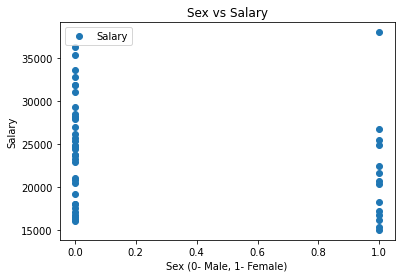

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [ ]:
df.plot(x='Sex', y='Salary', style='o')
#df.groupby('Sex')['Salary'].mean().plot()

plt.title('Sex vs Salary')
plt.xlabel('Sex (0- Male, 1- Female)')
plt.ylabel('Salary')
plt.show()

df[['Sex','Salary']].corr()

There is a low linear relationshp between the data.

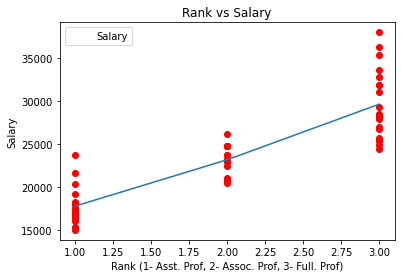

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [ ]:
df.plot(x='Rank', y='Salary', style='or')
df.groupby('Rank')['Salary'].mean().plot()

plt.title('Rank vs Salary')
plt.xlabel('Rank (1- Asst. Prof, 2- Assoc. Prof, 3- Full. Prof)')
plt.ylabel('Salary')
plt.show()

df[['Rank','Salary']].corr()


There is a high correlation (+ve linear relationshp) between the data. It is found that Higher the Professor's tenure position in the College, higer is their pay.

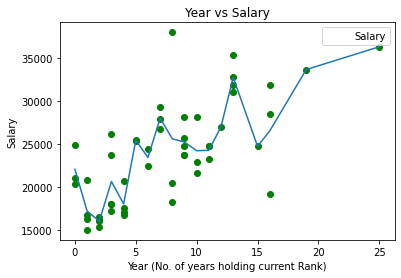

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [ ]:
df.plot(x='Year', y='Salary', style='og')
df.groupby('Year')['Salary'].mean().plot()

plt.title('Year vs Salary')
plt.xlabel('Year (No. of years holding current Rank)')
plt.ylabel('Salary')
plt.show()

df[['Year','Salary']].corr()

There is a high correlation (+ve linear relationshp) between the data. It is found that More the number of Years a Professor holds their current position,their pay gets increased.

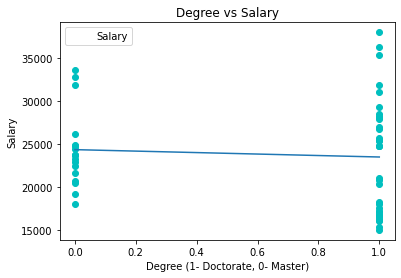

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
df.plot(x='Degree', y='Salary', style='oc')
df.groupby('Degree')['Salary'].mean().plot()

plt.title('Degree vs Salary')
plt.xlabel('Degree (1- Doctorate, 0- Master)')
plt.ylabel('Salary')
plt.show()

df[['Degree','Salary']].corr()

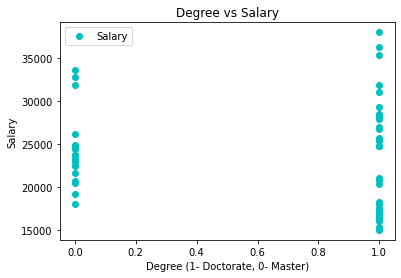

,Degree_square,Salary
Degree_square,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
df['Degree_square'] = np.square(df['Degree'])

df.plot(x='Degree_square', y='Salary', style='oc')
plt.title('Degree vs Salary')
plt.xlabel('Degree (1- Doctorate, 0- Master)')
plt.ylabel('Salary')
plt.show()

df[['Degree_square','Salary']].corr()

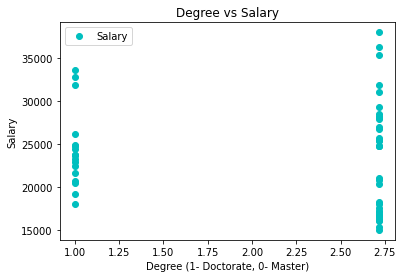

,Degree_exponential,Salary
Degree_exponential,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
df['Degree_exponential'] = np.exp(df['Degree'])

df.plot(x='Degree_exponential', y='Salary', style='oc')
plt.title('Degree vs Salary')
plt.xlabel('Degree (1- Doctorate, 0- Master)')
plt.ylabel('Salary')
plt.show()

df[['Degree_exponential','Salary']].corr()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


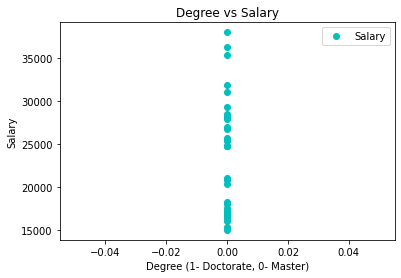

,logOf_Degree,Salary
logOf_Degree,NaN,NaN
Salary,NaN,1.0


In [ ]:
df['logOf_Degree'] = np.log(df['Degree'])

df.plot(x='logOf_Degree', y='Salary', style='oc')
plt.title('Degree vs Salary')
plt.xlabel('Degree (1- Doctorate, 0- Master)')
plt.ylabel('Salary')
plt.show()

df[['logOf_Degree','Salary']].corr()

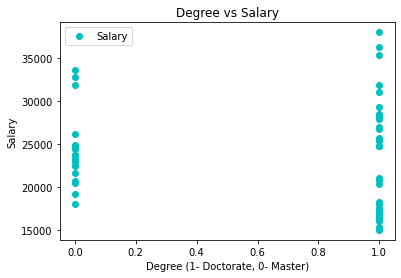

,Degree_SqRt,Salary
Degree_SqRt,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
df['Degree_SqRt'] = np.sqrt(df['Degree'])

df.plot(x='Degree_SqRt', y='Salary', style='oc')
plt.title('Degree vs Salary')
plt.xlabel('Degree (1- Doctorate, 0- Master)')
plt.ylabel('Salary')
plt.show()

df[['Degree_SqRt','Salary']].corr()

1) There is no correlation between Degree and Salary - hence cannot be considered for Linear regression

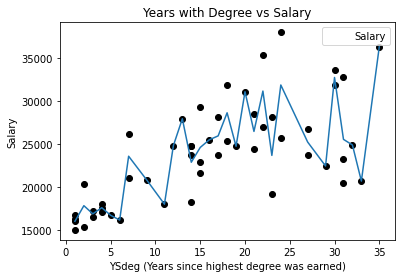

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [ ]:
df.plot(x='YSdeg', y='Salary', style='ok')
df.groupby('YSdeg')['Salary'].mean().plot()

plt.title('Years with Degree vs Salary')
plt.xlabel('YSdeg (Years since highest degree was earned)')
plt.ylabel('Salary')
plt.show()

df[['YSdeg','Salary']].corr()

There is a high correlation (+ve linear relationshp) between the data.

**TASK 1**

Find the linear regression equation for this data using columns 1-5 to column 6.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.loc[ :, ['Sex','Rank','Year','Degree','YSdeg']].values
Y = df['Salary'].values
#X
#Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) #random_state can be added if wanted 
#Y_test

from sklearn.preprocessing import StandardScaler ## standrard scaling 

scaler = StandardScaler() #initialise to a variable

scaler.fit(X_train,Y_train) #fit finds mean, std-deviation. 
    #NOTE: WE CAN ONLY FIND MEAN AND STANDARD DEVIATION FOR SCALING AND NORMALIZATION WITH TRAINING DATA

X_train_scaled = scaler.transform(X_train) # normalizing the training data

X_test_scaled = scaler.transform(X_test) # normalizing the test data 
#X_train_scaled
#-----------------------------------

from sklearn.linear_model import LinearRegression #IMPORTING

regressor = LinearRegression()  #INITIALIZATION

regressor.fit(X_train_scaled, Y_train)  #FITTING

#---------------------------------------

#PREDICTING OUTPUT FOR GIVEN TEST FEATURE DATA

Y_pred = regressor.predict(X_test_scaled)
#Y_pred

In [ ]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1

,Actual,Predicted
0,22450,22442.876143
1,23712,24016.944920
2,26182,22364.507924
3,36350,34878.231227
4,25748,27950.717892
5,21600,20697.068056
6,24750,26616.768572
7,38045,27443.574690
8,27959,27657.962181
9,31909,31625.405871


In [ ]:
#y = m1 * x1 + m2 * x2 + m3 * x3 + m4 * x4 + m5 * x5 + c

print("Predicted Salary (Y) = {} * Sex(x1) + {} * Rank(x2) + {} * Year(x3) + {} * Degree(x4) + {} *  YSdeg(x5) + {}".
      format(regressor.coef_[0],regressor.coef_[1],regressor.coef_[2],regressor.coef_[3],regressor.coef_[4],regressor.intercept_))

Predicted Salary (Y) = -14.884694359015917 * Sex(x1) + 3873.620672394776 * Rank(x2) + 2126.7011180527106 * Year(x3) + -339.43771192686336 * Degree(x4) + -607.6038629655816 *  YSdeg(x5) + 23157.083333333332


In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(Y_test,Y_pred))  #R2- Score for Sex, Rank, Years, Degree, YsDegree output- Salary

R2- SCORE: 0.7734918645005011


**TASK 2**

Find the selection of columns with the best R2 score.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ## standrard scaling
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import random
import itertools

def findMaxR2Score():
  features= ['Sex','Rank','Year','Degree','YSdeg']
  #dict_of_r2scores= {}
  rand_st= random.randint(1, 50)
  maxR2Score= 0
  maxFeature = []

  for i in range(0, len(features)+1):
    for combo in itertools.combinations(features, i): #feature in features
      if len(combo) > 0:

        X= df.loc[:, list(combo)].values
        Y= df['Salary'].values

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state= rand_st) #Random state has been added,
                                                                                                        #to get the same cobination of data for each iteration
        
        #----------------------------------------
        scaler = StandardScaler() #initialise to a variable
        
        scaler.fit(X_train,Y_train) #fit finds mean, std-deviation. 
            #NOTE: WE CAN ONLY FIND MEAN AND STANDARD DEVIATION FOR SCALING AND NORMALIZATION WITH TRAINING DATA
        
        X_train_scaled = scaler.transform(X_train) # normalizing the training data
        X_test_scaled = scaler.transform(X_test) # normalizing the test data
        #-----------------------------------------

        regressor1 = LinearRegression()  #INITIALIZATION
        regressor1.fit(X_train_scaled, Y_train)  #FITTING

        Y_pred = regressor1.predict(X_test_scaled)

        #-----------------------------------------

        if metrics.r2_score(Y_test,Y_pred) > maxR2Score:   #R2- Score
          maxR2Score= metrics.r2_score(Y_test,Y_pred)
          maxFeature= list(combo)
        #dict_of_r2scores[str(list(combo))] = metrics.r2_score(Y_test,Y_pred)

  print("Maximum R2 Score is for",maxFeature," and the R2 Score is:", maxR2Score)
  #for k in dict_of_r2scores.keys():
    #print(k,":", dict_of_r2scores[k])

#findMaxR2Score()

In [ ]:
findMaxR2Score()

Maximum R2 Score is for ['Rank', 'Year', 'YSdeg']  and the R2 Score is: 0.6551201997721404



**TASK 3**

Report whether sex is a factor in salary.

In [ ]:
import seaborn as sns

Total no. of Records:  52
Toatal no. of Woman professors (represented by 1) to Men professors (represented by 0):
0    38
1    14
Name: Sex, dtype: int64


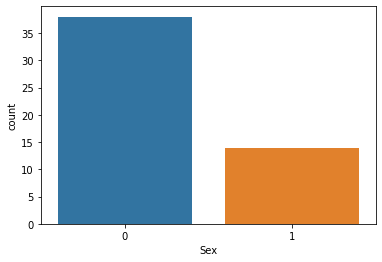

In [ ]:
print("Total no. of Records: ", df['Sex'].count())
print("Toatal no. of Woman professors (represented by 1) to Men professors (represented by 0):")
print(df.Sex.value_counts())

sns.countplot(x="Sex", data=df)

In [ ]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


There is also a very low CORRELATION BETWEEN SEX AND SALARY

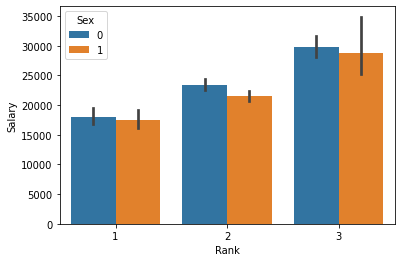

In [ ]:
sns.barplot(x=df['Rank'], y= df['Salary'], hue=df['Sex'], data=df)

We can also see that the On the basis of their rank the Average Salary a Male Professor earns is not much different from what a Female Professor receives

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ## standrard scaling
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import random
import itertools

def findMaxR2Score():
  features= ['Sex','Rank','Year','Degree','YSdeg']
  f = []
  dict_of_r2scores= {}
  rand_st= random.randint(1, 50)

  for i in range(0, len(features)+1):
    for combo in itertools.combinations(features, i): #feature in features
      if len(combo) > 0:

        X= df.loc[:, list(combo)].values
        Y= df['Salary'].values

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state= rand_st) #Random state has been added,
                                                                                                        #to get the same cobination of data for each iteration
        
        #----------------------------------------
        scaler = StandardScaler() #initialise to a variable
        
        scaler.fit(X_train,Y_train) #fit finds mean, std-deviation. 
            #NOTE: WE CAN ONLY FIND MEAN AND STANDARD DEVIATION FOR SCALING AND NORMALIZATION WITH TRAINING DATA
        
        X_train_scaled = scaler.transform(X_train) # normalizing the training data
        X_test_scaled = scaler.transform(X_test) # normalizing the test data
        #-----------------------------------------

        regressor1 = LinearRegression()  #INITIALIZATION
        regressor1.fit(X_train_scaled, Y_train)  #FITTING

        Y_pred = regressor1.predict(X_test_scaled)

        #-----------------------------------------

        dict_of_r2scores[str(list(combo))] = metrics.r2_score(Y_test,Y_pred)

  for k in dict_of_r2scores.keys():
    print(k,":", dict_of_r2scores[k])

findMaxR2Score()

['Sex'] : -0.5476323978911075
['Rank'] : 0.760267911543489
['Year'] : 0.1502256470958241
['Degree'] : -0.745566293590461
['YSdeg'] : 0.08981326845372894
['Sex', 'Rank'] : 0.7554110116166373
['Sex', 'Year'] : 0.1426071642126565
['Sex', 'Degree'] : -0.5889246928163754
['Sex', 'YSdeg'] : 0.20545847304593878
['Rank', 'Year'] : 0.871949747248489
['Rank', 'Degree'] : 0.7719574318459131
['Rank', 'YSdeg'] : 0.7512047432922467
['Year', 'Degree'] : 0.1450294409535383
['Year', 'YSdeg'] : 0.32402612793376273
['Degree', 'YSdeg'] : 0.19869497004929926
['Sex', 'Rank', 'Year'] : 0.8336627919238662
['Sex', 'Rank', 'Degree'] : 0.7641805069381016
['Sex', 'Rank', 'YSdeg'] : 0.7438147608188788
['Sex', 'Year', 'Degree'] : 0.14029241733148645
['Sex', 'Year', 'YSdeg'] : 0.3108238523165203
['Sex', 'Degree', 'YSdeg'] : 0.3408991557434934
['Rank', 'Year', 'Degree'] : 0.8725635136753187
['Rank', 'Year', 'YSdeg'] : 0.8767179889300856
['Rank', 'Degree', 'YSdeg'] : 0.725676623691737
['Year', 'Degree', 'YSdeg'] : 0.3

It is also worth noting that R2 Score for the SEX- SALARY Linear regression model is less or very close to zero, indicating that it has SEX no direct influence on salary.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.loc[ :, ['Sex','Rank','Year','Degree','YSdeg']].values
Y = df['Salary'].values
#X
#Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) #random_state can be added if wanted 
#Y_test

from sklearn.preprocessing import StandardScaler ## standrard scaling 

scaler = StandardScaler() #initialise to a variable

scaler.fit(X_train,Y_train) #fit finds mean, std-deviation. 
    #NOTE: WE CAN ONLY FIND MEAN AND STANDARD DEVIATION FOR SCALING AND NORMALIZATION WITH TRAINING DATA

X_train_scaled = scaler.transform(X_train) # normalizing the training data

X_test_scaled = scaler.transform(X_test) # normalizing the test data 
#X_train_scaled
#-----------------------------------

from sklearn.linear_model import LinearRegression #IMPORTING

regressor = LinearRegression()  #INITIALIZATION

regressor.fit(X_train_scaled, Y_train)  #FITTING

#---------------------------------------

#PREDICTING OUTPUT FOR GIVEN TEST FEATURE DATA

Y_pred = regressor.predict(X_test_scaled)
#Y_pred

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex','Rank','Year','Degree','YSdeg'], columns=['Coefficient'])
coeff_df

,Coefficient
Sex,843.158078
Rank,4636.470968
Year,2971.450463
Degree,-618.899661
YSdeg,-1259.553605


From the absolute values of Coefficient for the selected columns, we can infer that :

1.it is actually the Rank (I) and the The no. of Years (II) that has the most importance. From the above we can even see that the R2 Scores for ['Rank', 'Year'] - SALARY IS VERY HIGH.

2.The absolute value of Coefficiet for Sex keeps varying from being 3rd in importance to even being LAST in importance.

In [ ]:
#FORMULA: PREDICTED SALARY(Y) = regressor.predict([[SEX,RANK,YEAR,DEGREE,YSdgree]])
#Sex. 1 for female, 0 for male.
#Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
#Year. Number of years in current rank.
#Degree. 0 for master's, 1 for doctorate, .
#YSdeg. Years since highest degree was earned.

Y_pred_FOR_MALEPROF = regressor.predict([[0,1,3,0,2]])
print("Approx salary for Male Assistant Professor of 3 years, having Masters degree since 2 Years:", Y_pred_FOR_MALEPROF)

Y_pred_FOR_FEMALEPROF = regressor.predict([[1,1,3,0,2]])
print("Approx salary for Female Assistant Professor of 3 years, having Masters degree since 2 Years:", Y_pred_FOR_FEMALEPROF)

Approx salary for Male Assistant Professor of 3 years, having Masters degree since 2 Years: [35959.88181518]
Approx salary for Female Assistant Professor of 3 years, having Masters degree since 2 Years: [36803.03989303]


Finally From a sample input of Male Professor data vs Female Professor data and predicting their Salary, we can see the Both of them receive almost same Salary.

HENCE WE CAN INFER THAT SEX IS NOT AN IMPORTANT FACTOR TO DETERMINE THE SALARY OF THE PROFESSOR.